In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
prices = pd.read_csv('avocado.csv')
prices
prices_total = prices

###Date - The date of the observation
###AveragePrice - the average price of a single avocado
###type - conventional or organic
###year - the year
###Region - the city or region of the observation
###Total Volume - Total number of avocados sold
###4046 - Total number of avocados with PLU 4046 sold
###4225 - Total number of avocados with PLU 4225 sold
###4770 - Total number of avocados with PLU 4770 sold

The outcome variable for this data set will be the Average Price of Avocadoes through the lens of the Total Bags, Small Bags, Large Bags, X Large Bags, Total Volume, type and region. 

The following variables are continious : Total Bags, Small Bags, Large Bags, X Large Bags, and Total Volume. 

The following variables are categorical : Type and Region

In [3]:
prices = prices.drop(['Unnamed: 0'], axis=1)
prices = prices.drop(['4046'], axis=1)
prices = prices.drop(['4225'], axis=1)
prices = prices.drop(['4770'], axis=1)
print(prices)

             Date  AveragePrice  Total Volume  Total Bags  Small Bags  \
0      2015-12-27          1.33      64236.62     8696.87     8603.62   
1      2015-12-20          1.35      54876.98     9505.56     9408.07   
2      2015-12-13          0.93     118220.22     8145.35     8042.21   
3      2015-12-06          1.08      78992.15     5811.16     5677.40   
4      2015-11-29          1.28      51039.60     6183.95     5986.26   
5      2015-11-22          1.26      55979.78     6683.91     6556.47   
6      2015-11-15          0.99      83453.76     8318.86     8196.81   
7      2015-11-08          0.98     109428.33     6829.22     6266.85   
8      2015-11-01          1.02      99811.42    11388.36    11104.53   
9      2015-10-25          1.07      74338.76     8625.92     8061.47   
10     2015-10-18          1.12      84843.44     8205.66     7877.86   
11     2015-10-11          1.28      64489.17    10123.90     9866.27   
12     2015-10-04          1.31      61007.10     8

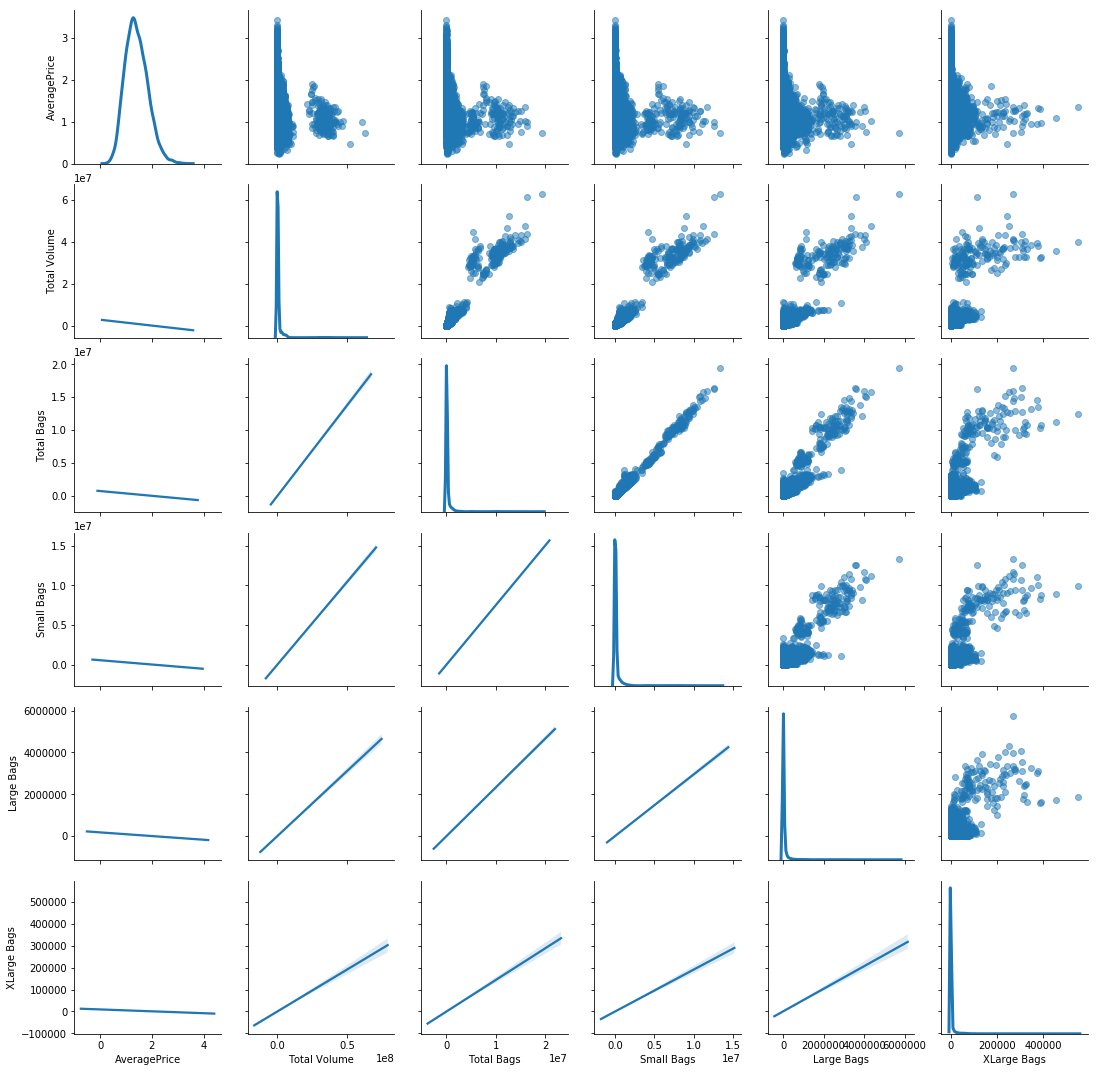

In [4]:
prices_jittered = prices.loc[:,'AveragePrice' :'XLarge Bags'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(prices_jittered.shape)),
    columns=prices_jittered.columns
)

prices_jittered = prices_jittered.add(jitter)

g = sns.PairGrid(prices_jittered.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()

              AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
AveragePrice      1.000000     -0.192752   -0.177088   -0.174730   -0.172940   
Total Volume     -0.192752      1.000000    0.963047    0.967238    0.880640   
Total Bags       -0.177088      0.963047    1.000000    0.994335    0.943009   
Small Bags       -0.174730      0.967238    0.994335    1.000000    0.902589   
Large Bags       -0.172940      0.880640    0.943009    0.902589    1.000000   
XLarge Bags      -0.117592      0.747157    0.804233    0.806845    0.710858   
year              0.093197      0.017193    0.071552    0.063915    0.087891   

              XLarge Bags      year  
AveragePrice    -0.117592  0.093197  
Total Volume     0.747157  0.017193  
Total Bags       0.804233  0.071552  
Small Bags       0.806845  0.063915  
Large Bags       0.710858  0.087891  
XLarge Bags      1.000000  0.081033  
year             0.081033  1.000000  


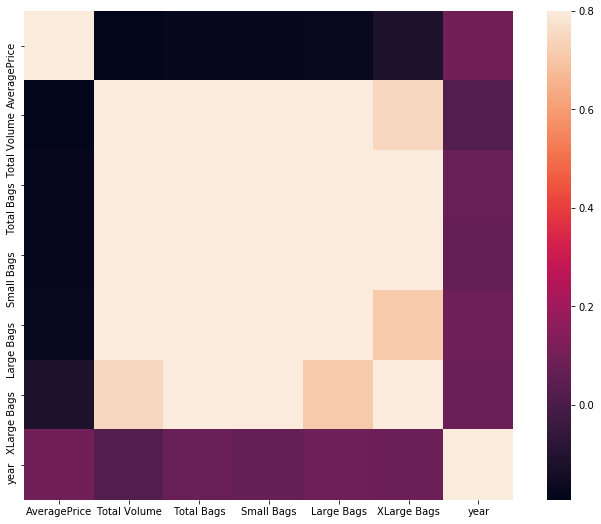

In [5]:
corrmat = prices.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [9]:
####prices_long = pd.melt(prices_long, id_vars=['type'])

###g = sns.FacetGrid(prices_long, col='variable', size=4, aspect=.5)
###g = g.map(sns.boxplot,'value','variable')
##plt.show()


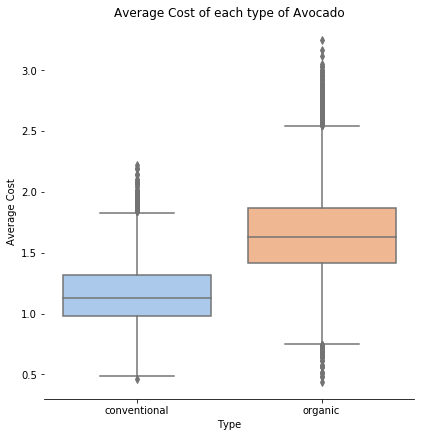

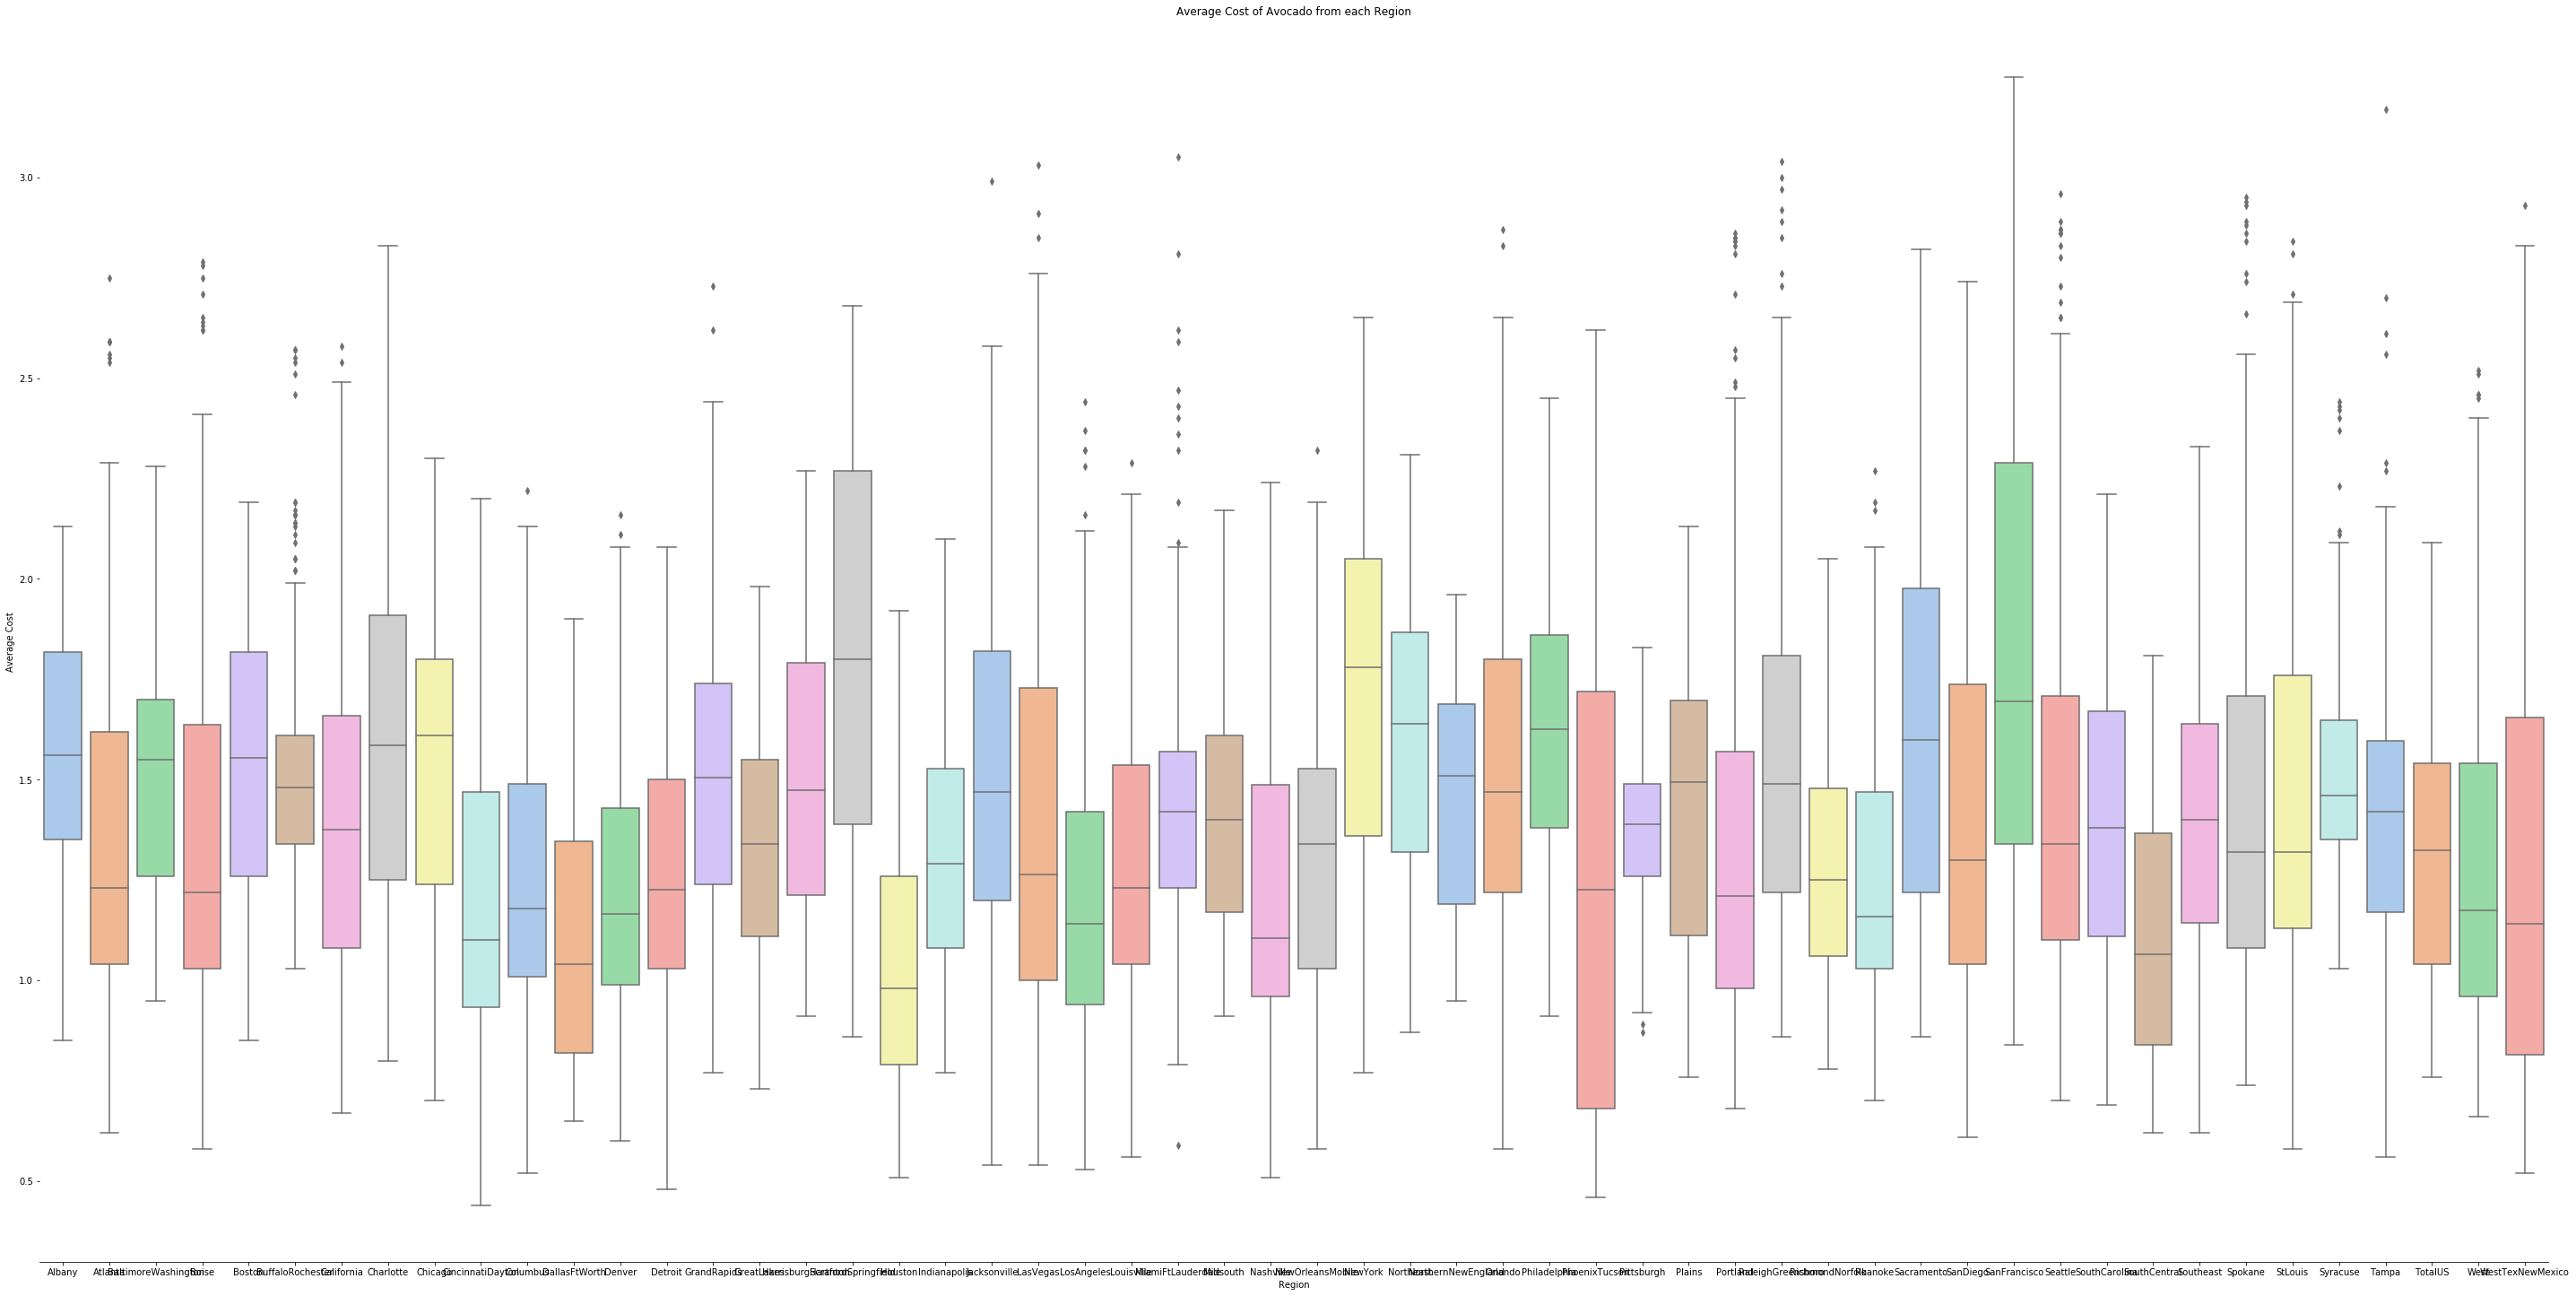

In [6]:
b = sns.catplot(x='type', y='AveragePrice', data =prices, 
                 kind="box", palette="pastel",
                 height=6, aspect= 1 / 1,ci=95)
b.despine(left=True)
b.set_ylabels("Average Cost")
b.set_xlabels("Type")
plt.title('Average Cost of each type of Avocado')
plt.show()

b = sns.catplot(x='region', y='AveragePrice', data =prices, 
                 kind="box", palette="pastel",
                 height=20, aspect= 2 / 1,ci=95)
b.despine(left=True)
b.set_ylabels("Average Cost")
b.set_xlabels("Region")
plt.title('Average Cost of Avocado from each Region')
plt.show()

In [7]:
prices.groupby('type').describe()

AveragePrice                                                    \
                    count      mean       std   min   25%   50%   75%   max   
type                                                                          
conventional       9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22   
organic            9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25   

             Large Bags                  ...   XLarge Bags               year  \
                  count           mean   ...           75%        max   count   
type                                     ...                                    
conventional     9126.0  101457.698855   ...      2409.215  551693.65  9126.0   
organic          9123.0    7202.982659   ...         0.000     510.41  9123.0   

                                                                             
                     mean       std     min     25%     50%     75%     max  
type                                                                         
conventional  2016.147929  0.939968  2015.0  2015.0  2016.0  2017.0  2018.0  
organic       2016.147868  0.939961  2015.0  2015.0  2016.0  2017.0  2018.0  

[2 rows x 56 columns]

In [8]:
prices.groupby('region').describe()

AveragePrice                                           \
                           count      mean       std   min     25%    50%   
region                                                                      
Albany                     338.0  1.561036  0.291986  0.85  1.3500  1.560   
Atlanta                    338.0  1.337959  0.398297  0.62  1.0400  1.230   
BaltimoreWashington        338.0  1.534231  0.299428  0.95  1.2600  1.550   
Boise                      338.0  1.348136  0.457911  0.58  1.0300  1.220   
Boston                     338.0  1.530888  0.328074  0.85  1.2600  1.555   
BuffaloRochester           338.0  1.516834  0.274362  1.03  1.3400  1.480   
California                 338.0  1.395325  0.390543  0.67  1.0800  1.375   
Charlotte                  338.0  1.606036  0.414492  0.80  1.2500  1.585   
Chicago                    338.0  1.556775  0.335439  0.70  1.2400  1.610   
CincinnatiDayton           338.0  1.209201  0.351322  0.44  0.9325  1.100   
Columbus                   338.0  1.252781  0.315908  0.52  1.0100  1.180   
DallasFtWorth              338.0  1.085592  0.295742  0.65  0.8200  1.040   
Denver                     338.0  1.218580  0.317915  0.60  0.9900  1.165   
Detroit                    338.0  1.276095  0.318164  0.48  1.0300  1.225   
GrandRapids                338.0  1.505000  0.369502  0.77  1.2400  1.505   
GreatLakes                 338.0  1.338550  0.256373  0.73  1.1100  1.340   
HarrisburgScranton         338.0  1.513284  0.318204  0.91  1.2125  1.475   
HartfordSpringfield        338.0  1.818639  0.468989  0.86  1.3900  1.800   
Houston                    338.0  1.047929  0.302155  0.51  0.7900  0.980   
Indianapolis               338.0  1.313994  0.282894  0.77  1.0800  1.290   
Jacksonville               338.0  1.510947  0.417741  0.54  1.2000  1.470   
LasVegas                   338.0  1.380917  0.473968  0.54  1.0000  1.265   
LosAngeles                 338.0  1.216006  0.378557  0.53  0.9400  1.140   
Louisville                 338.0  1.286686  0.318991  0.56  1.0400  1.230   
MiamiFtLauderdale          338.0  1.428491  0.336494  0.59  1.2300  1.420   
Midsouth                   338.0  1.404763  0.263633  0.91  1.1700  1.400   
Nashville                  338.0  1.212101  0.332029  0.51  0.9600  1.105   
NewOrleansMobile           338.0  1.304793  0.300137  0.58  1.0300  1.340   
NewYork                    338.0  1.727574  0.395898  0.77  1.3600  1.780   
Northeast                  338.0  1.601923  0.313513  0.87  1.3200  1.640   
NorthernNewEngland         338.0  1.477396  0.296769  0.95  1.1900  1.510   
Orlando                    338.0  1.506213  0.393153  0.58  1.2200  1.470   
Philadelphia               338.0  1.632130  0.320284  0.91  1.3800  1.625   
PhoenixTucson              338.0  1.224438  0.548283  0.46  0.6800  1.225   
Pittsburgh                 338.0  1.364320  0.175473  0.87  1.2600  1.390   
Plains                     338.0  1.436509  0.326350  0.76  1.1125  1.495   
Portland                   338.0  1.317722  0.464029  0.68  0.9800  1.210   
RaleighGreensboro          338.0  1.555118  0.427306  0.86  1.2200  1.490   
RichmondNorfolk            338.0  1.291331  0.256114  0.78  1.0600  1.250   
Roanoke                    338.0  1.247929  0.281199  0.70  1.0300  1.160   
Sacramento                 338.0  1.621568  0.445139  0.86  1.2200  1.600   
SanDiego                   338.0  1.398166  0.456451  0.61  1.0400  1.300   
SanFrancisco               338.0  1.804201  0.565371  0.84  1.3400  1.695   
Seattle                    338.0  1.442574  0.472787  0.70  1.1000  1.340   
SouthCarolina              338.0  1.403284  0.330502  0.69  1.1100  1.380   
SouthCentral               338.0  1.101243  0.287162  0.62  0.8400  1.065   
Southeast                  338.0  1.398018  0.320415  0.62  1.1425  1.400   
Spokane                    338.0  1.445592  0.485965  0.74  1.0800  1.320   
StLouis                    338.0  1.430621  0.418003  0.58  1.1300  1.320   
Syracuse        

Feature One : 
    Sorting By West Coast Only

In [9]:
feature_one = pd.get_dummies(prices['region'])
feature_one['West Coast'] = np.where((prices['region'].isin(['West', 'WestTexNewMexico','Seattle','SanFrancisco',
                                                             'SanDiego','Portland','PhoenixTucson','LosAngeles','LasVegas',
                                                             'California'])), 1, 0)
print(pd.crosstab(feature_one['West Coast'], prices['region']))

region      Albany  Atlanta  BaltimoreWashington  Boise  Boston  \
West Coast                                                        
0              338      338                  338    338     338   
1                0        0                    0      0       0   

region      BuffaloRochester  California  Charlotte  Chicago  \
West Coast                                                     
0                        338           0        338      338   
1                          0         338          0        0   

region      CincinnatiDayton        ...         SouthCarolina  SouthCentral  \
West Coast                          ...                                       
0                        338        ...                   338           338   
1                          0        ...                     0             0   

region      Southeast  Spokane  StLouis  Syracuse  Tampa  TotalUS  West  \
West Coast                                                                
0      

Feature Two : Type of Avocado

In [10]:
feature_two = pd.get_dummies(prices['type'])
feature_two['Type'] = np.where((prices['type'].isin(['organic'])), 1, 0)
print(pd.crosstab(feature_two['Type'], prices['type']))

type  conventional  organic
Type                       
0             9126        0
1                0     9123


Feature Threee : No Xlarge Bags sold

In [11]:
prices['No XL'] = np.where(prices['XLarge Bags']> 0, 1, 0)

print(prices['XLarge Bags'].groupby(prices['No XL']).describe())

         count         mean           std  min     25%     50%      75%  \
No XL                                                                     
0      12048.0     0.000000      0.000000  0.0    0.00     0.0     0.00   
1       6201.0  9141.941192  29430.559529  1.0  109.72  1130.0  4914.98   

             max  
No XL             
0           0.00  
1      551693.65  


Feature Four : Volume Per Bag

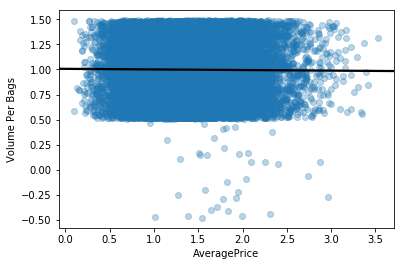

In [12]:
prices['Volume Per Bags'] = prices['Total Volume']/prices['Total Bags']
prices['Volume Per Bags'] = np.where(prices['Volume Per Bags']<1000, 1, 0)
sns.regplot(
    prices['AveragePrice'],
    prices['Volume Per Bags'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

Feature 5 : Total Spend

In [14]:
prices_total['Total Spend'] = prices_total['AveragePrice'] * prices_total['Total Volume']
prices_total

prices_total.groupby('year').sum()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Total Spend
year,,,,,,,,,,,
2015,143157,7723.94,4.385469e+09,1.709450e+09,1.761054e+09,1.427724e+08,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28,4.488448e+09
2016,143208,7517.80,4.820890e+09,1.525123e+09,1.672728e+09,1.598798e+08,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84,4.997590e+09
2017,148721,8669.56,4.934306e+09,1.652038e+09,1.544735e+09,9.121751e+07,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34,5.965750e+09
2018,7128,1746.40,1.382738e+09,4.604997e+08,4.077587e+08,2.293259e+07,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87,1.482343e+09


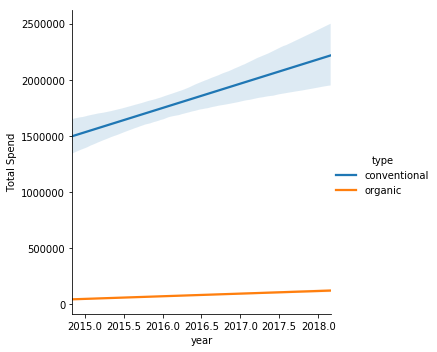

In [16]:
sns.lmplot(
    x='year',
    y='Total Spend',
    hue='type',
    data=prices_total,
    scatter=False
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

The five features I will look to model the price of avocados are : 
* Total Volume
* Type of Avocado
* Region
* Total Spend
* Total Bags Sold